In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [37]:
df = pd.read_excel('SMU_DS_Capstone_DataSet.xlsx',header=2)  
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [38]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
# Filling missing numerical values with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


In [40]:
# Filling missing categorical values with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Self_Employed'].fillna('No', inplace=True)
df['Credit_History'].fillna(1, inplace=True)
# Handling Missing Values in Depth
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['ApplicantIncome'].fillna(df['ApplicantIncome'].median(), inplace=True)
df['Self_Employed'].fillna('No', inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

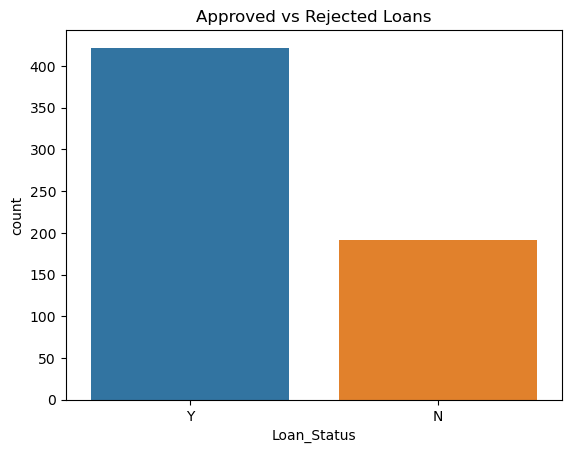

In [9]:
#Approved vs Rejected Loans
# Count plot for Loan Status
sns.countplot(x='Loan_Status', data=df)
plt.title('Approved vs Rejected Loans')
plt.show()

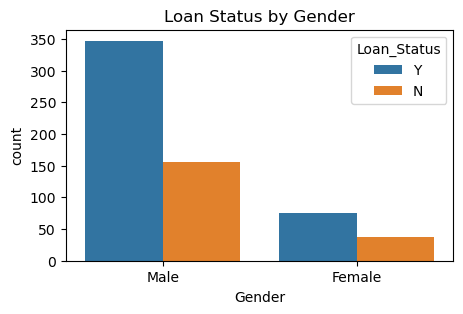

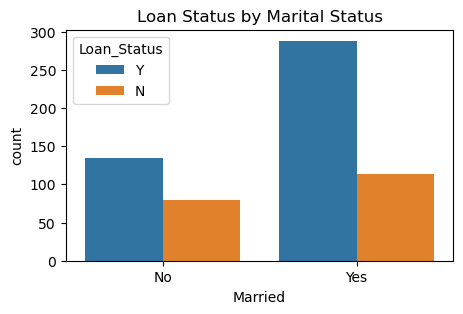

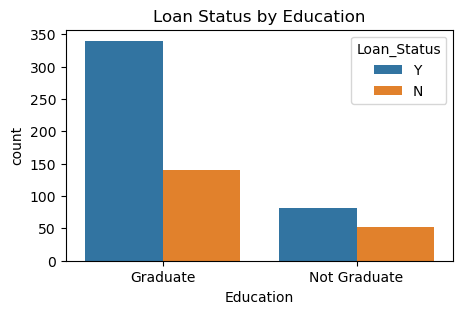

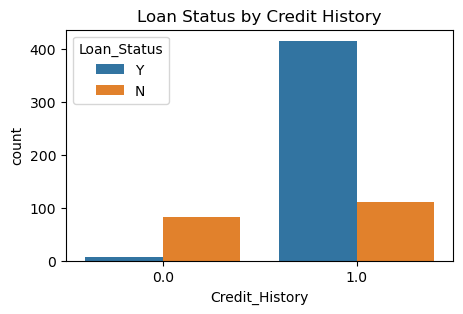

In [41]:
#Loan Status by Gender, Marital Status, Education, and Credit History

# Loan Status by Gender
plt.figure(figsize=(5, 3))
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.title('Loan Status by Gender')
plt.show()

# Loan Status by Marital Status
plt.figure(figsize=(5, 3))
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.title('Loan Status by Marital Status')
plt.show()

# Loan Status by Education
plt.figure(figsize=(5, 3))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Loan Status by Education')
plt.show()

# Loan Status by Credit History
plt.figure(figsize=(5, 3))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Loan Status by Credit History')
plt.show()

In [42]:
# Handling Missing Values in Depth
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['ApplicantIncome'].fillna(df['ApplicantIncome'].median(), inplace=True)
df['Self_Employed'].fillna('No', inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [20]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

 Feature Selection

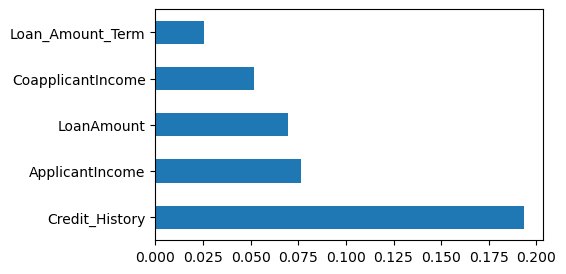

In [43]:
# Convert categorical columns into numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Define X (features) and y (target)
X = df_encoded.drop('Loan_Status_Y', axis=1)
y = df_encoded['Loan_Status_Y']

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Plot feature importance
plt.figure(figsize=(5, 3))
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(5).plot(kind='barh')
plt.show()

 Building a Logistic Regression Model

In [44]:
# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
# Build and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [46]:
# Predicting loan status on test data
y_pred = logreg.predict(X_test)
y_pred


# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Accuracy: 0.78
Confusion Matrix:
 [[ 27  38]
 [  2 118]]
